# Scaling / Timing Analysis

## Setup

Load Python, R, etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Load the data

In [4]:
timings = pd.read_csv('build/timing.csv')
timings

,dataset,mptype,threads,mkl_threads,run,time
0,ml-1m,openmp,1,NaN,0,27.093712
1,ml-1m,openmp,1,NaN,1,23.800712
2,ml-1m,openmp,1,NaN,2,23.783920
3,ml-1m,openmp,1,NaN,3,23.802316
4,ml-1m,openmp,1,NaN,4,23.828656
5,ml-1m,openmp,1,1.0,0,27.110412
6,ml-1m,openmp,1,1.0,1,23.814452
7,ml-1m,openmp,1,1.0,2,23.788098
8,ml-1m,openmp,1,1.0,3,23.869884
9,ml-1m,openmp,1,1.0,4,23.980412


Extract the sequential timings:

In [5]:
seq_time = timings[timings.mptype == 'seq']
omp_time = timings[timings.mptype == 'openmp'].copy()

In [6]:
seq_time.time.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: time, dtype: float64

In [7]:
mean_seq = seq_time.groupby('dataset').time.mean()
mean_seq

Series([], Name: time, dtype: float64)

In [8]:
omp_time = omp_time.set_index(['dataset', 'threads', 'run']).assign(adj_time = lambda df: mean_seq / df.time).reset_index()
omp_time.head()

,dataset,threads,run,mptype,mkl_threads,time,adj_time
0,ml-1m,1,0,openmp,NaN,27.093712,NaN
1,ml-1m,1,1,openmp,NaN,23.800712,NaN
2,ml-1m,1,2,openmp,NaN,23.783920,NaN
3,ml-1m,1,3,openmp,NaN,23.802316,NaN
4,ml-1m,1,4,openmp,NaN,23.828656,NaN


In [12]:
omp_time.loc[omp_time.mkl_threads.isna(), 'mkl_threads'] = 0

## Plot OpenMP speedups

In [13]:
omp_means = omp_time[omp_time.threads.notna()].groupby(['dataset', 'threads', 'mkl_threads']).time.agg(['mean', 'min', 'max']).reset_index()
omp_means

,dataset,threads,mkl_threads,mean,min,max
0,ml-1m,1,0.0,24.461863,23.783920,27.093712
1,ml-1m,1,1.0,24.512651,23.788098,27.110412
2,ml-1m,1,2.0,30.293839,29.595185,32.794637
3,ml-1m,1,4.0,28.062886,27.147981,30.711793
4,ml-1m,1,8.0,31.027185,30.211490,32.971974
5,ml-1m,2,0.0,15.203784,14.515889,17.809037
6,ml-1m,2,1.0,15.048618,14.232769,17.376851
7,ml-1m,2,2.0,15.068849,14.247111,18.088061
8,ml-1m,2,4.0,15.703299,14.647544,18.617001
9,ml-1m,2,8.0,16.769355,15.884742,19.380174


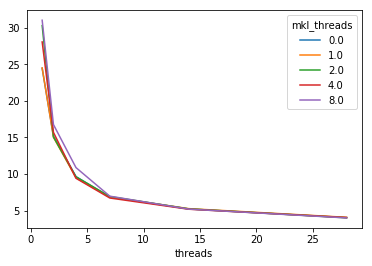

In [14]:
rdf = omp_means.pivot(index='threads', columns='mkl_threads', values='mean')
rdf.plot()

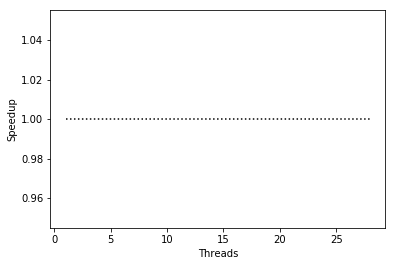

In [10]:
fig, ax = plt.subplots()
# omp_means[omp_means.dataset == 'ml-100k'].plot.scatter(x='threads', y='mean', color='blue', label='ML100K', ax=ax)
# omp_means[omp_means.dataset == 'ml-1m'].plot.scatter(x='threads', y='mean', color='red', label='ML1M', ax=ax)
ax.set_xlabel('Threads')
ax.set_ylabel('Speedup')
plt.hlines(1, omp_means.threads.min(), omp_means.threads.max(), linestyles='dotted')
plt.show()